In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [51]:
df = pd.read_csv("loan.csv")
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [52]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [54]:
df.shape

(614, 13)

In [55]:
df.drop("Loan_ID", axis=1, inplace=True)

In [56]:
df.shape

(614, 12)

## Performing EDA

In [57]:
object_column = df.select_dtypes(include='object').columns.to_list()

In [58]:
object_column

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [59]:
df['Gender'].mode()[0]

'Male'

In [60]:
for col in  object_column:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [61]:
object_number = df.select_dtypes(include='float').columns.to_list()
object_number

['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [62]:
for col in  object_number:
    # print(df[col])
    df[col].fillna(df[col].median(), inplace=True)

In [63]:
# df[df['Gender'].isnull()]

In [64]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [65]:
df['Dependents'].replace('3+','3' , inplace=True)

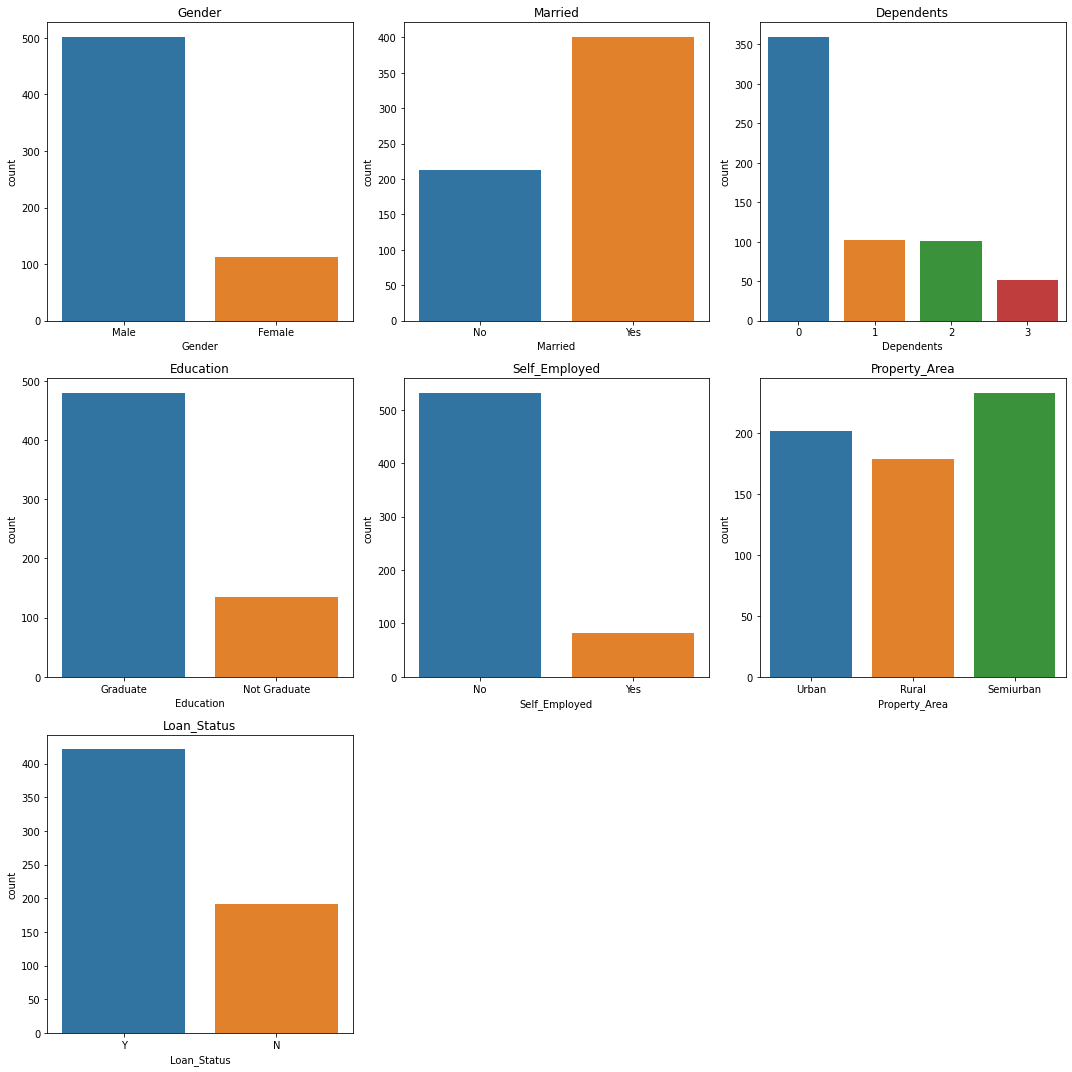

In [66]:
num_cols = len(object_column)
num_rows = (num_cols+2)//3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()
for i, var in enumerate(object_column):
    top_values = df[var].value_counts().nlargest(6).index
    filtered_df = df[df[var].isin(top_values)]
    sns.countplot(x=var, data=filtered_df, ax=axs[i])
    axs[i].set_title(var)
    # axs[i].tick_params(axis='x', rotation=90)
    
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()


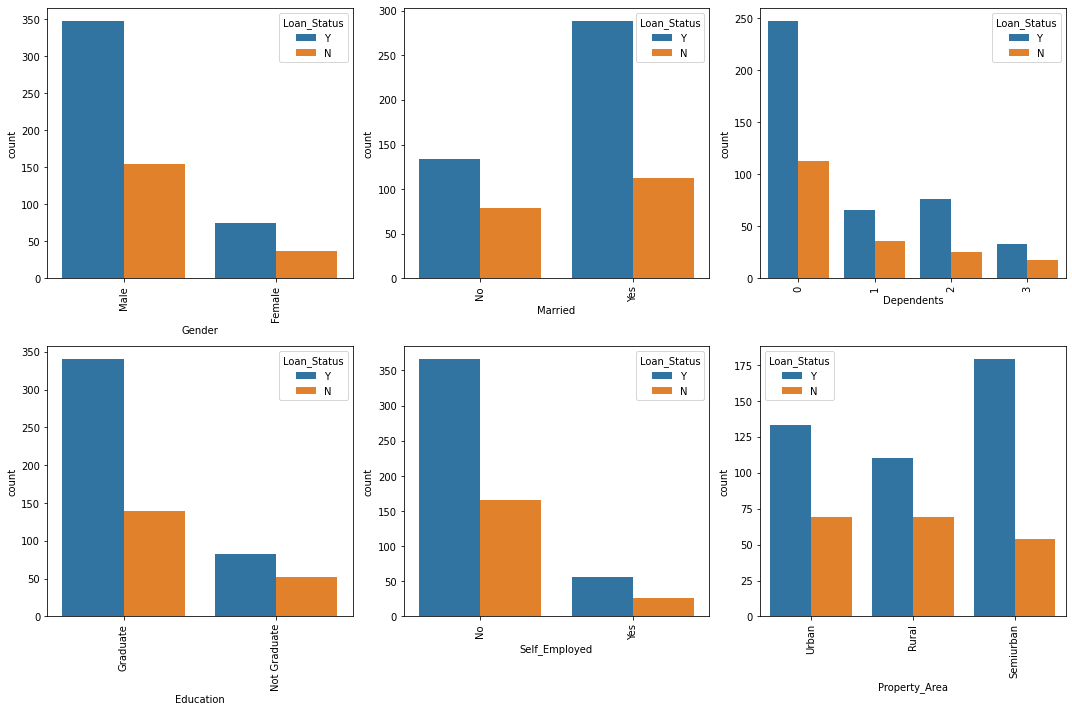

In [67]:
# Get the names of all columns with data type 'object' (categorical variables)
cat_vars = df.select_dtypes(include=['object']).columns.tolist()

# Exclude 'Attrition' from the list if it exists in cat_vars
if 'Loan_Status' in cat_vars:
    cat_vars.remove('Loan_Status')

# Create a figure with subplots, but only include the required number of subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a count plot for the top 6 values of each categorical variable
for i, var in enumerate(cat_vars):
    top_values = df[var].value_counts().nlargest(6).index
    filtered_df = df[df[var].isin(top_values)]
    sns.countplot(x=var, hue='Loan_Status', data=filtered_df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# Remove any remaining blank subplots
for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

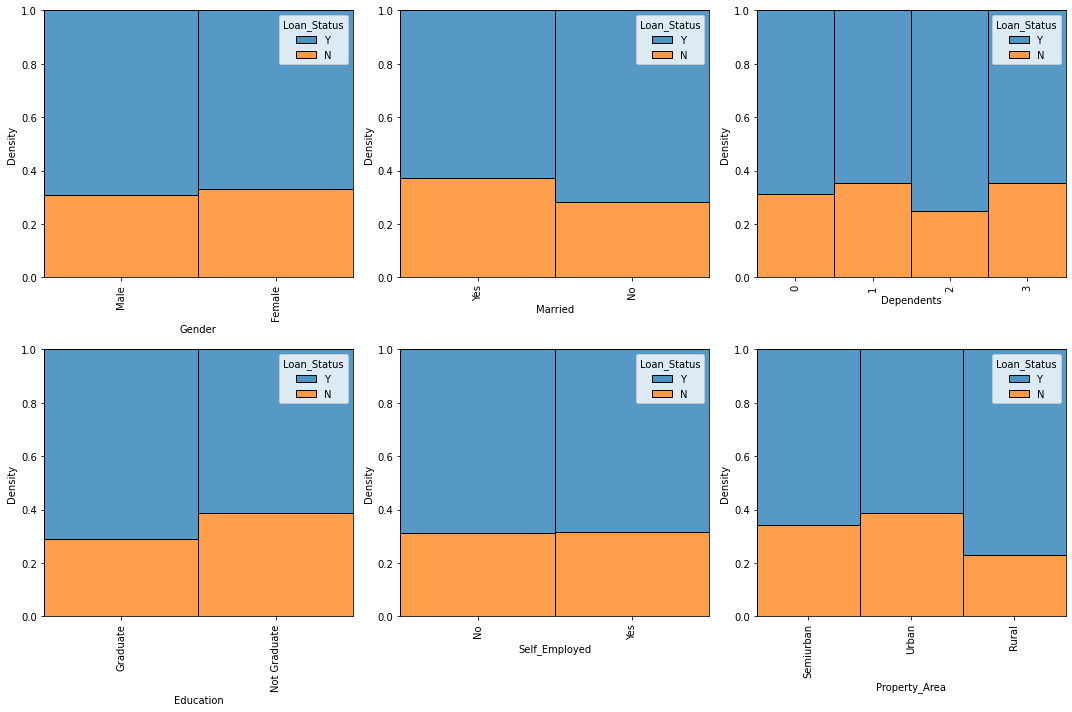

In [68]:
import warnings

# Get the names of all columns with data type 'object' (categorical variables)
cat_vars = df.select_dtypes(include=['object']).columns.tolist()

# Exclude 'Attrition' from the list if it exists in cat_vars
if 'Loan_Status' in cat_vars:
    cat_vars.remove('Loan_Status')

# Create a figure with subplots, but only include the required number of subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a count plot for the top 6 values of each categorical variable as a density plot
for i, var in enumerate(cat_vars):
    top_values = df[var].value_counts().nlargest(6).index
    filtered_df = df[df[var].isin(top_values)]

    # Set x-tick positions explicitly
    tick_positions = range(len(top_values))
    axs[i].set_xticks(tick_positions)
    axs[i].set_xticklabels(top_values, rotation=90)  # Set x-tick labels

    sns.histplot(x=var, hue='Loan_Status', data=filtered_df, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True, stat='density')
    axs[i].set_xlabel(var)

# Remove any remaining blank subplots
for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

In [69]:
# create the figure with subplot


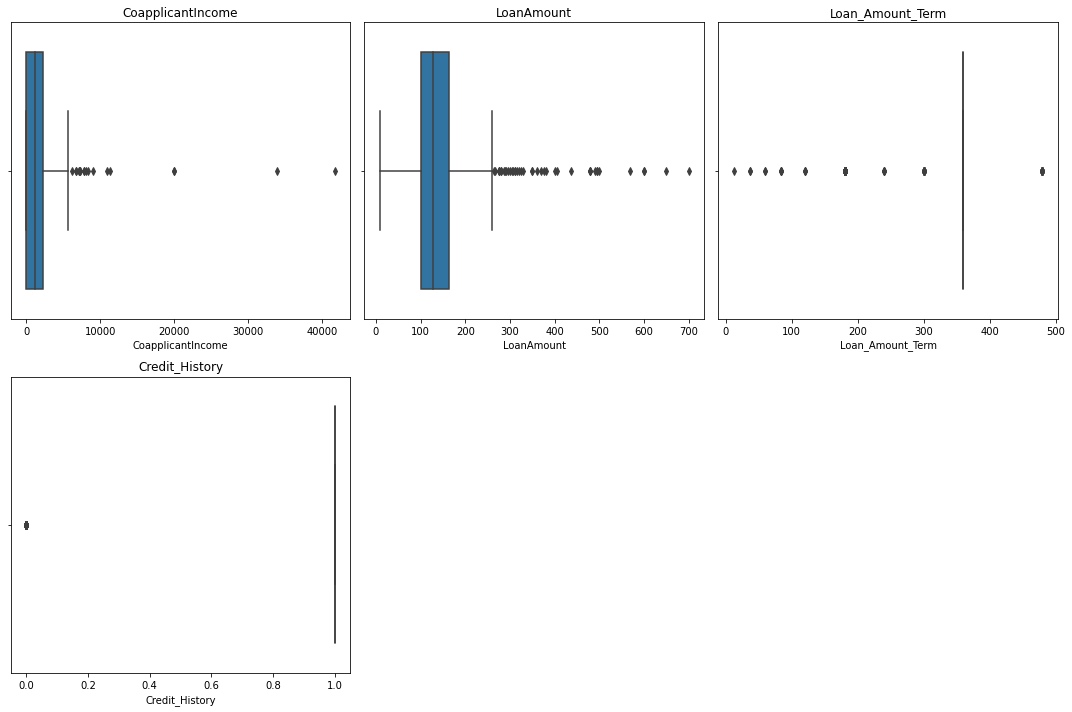

In [70]:
num_cols = len(object_number)
num_rows = (num_cols+2)//3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15,5*num_rows))
axs = axs.flatten()

#  Create a box plot for each numerical variable using Seaborn
for i, var in enumerate(object_number):
    sns.boxplot(x=df[var], ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

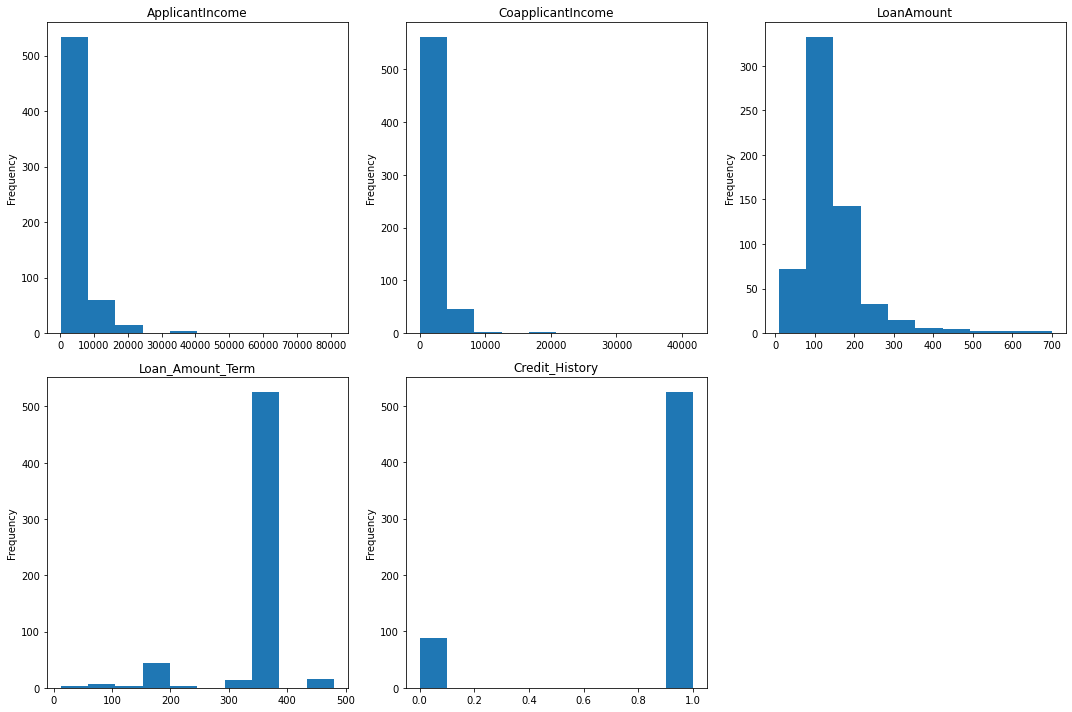

In [71]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable
for i, var in enumerate(int_vars):
    df[var].plot.hist(ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

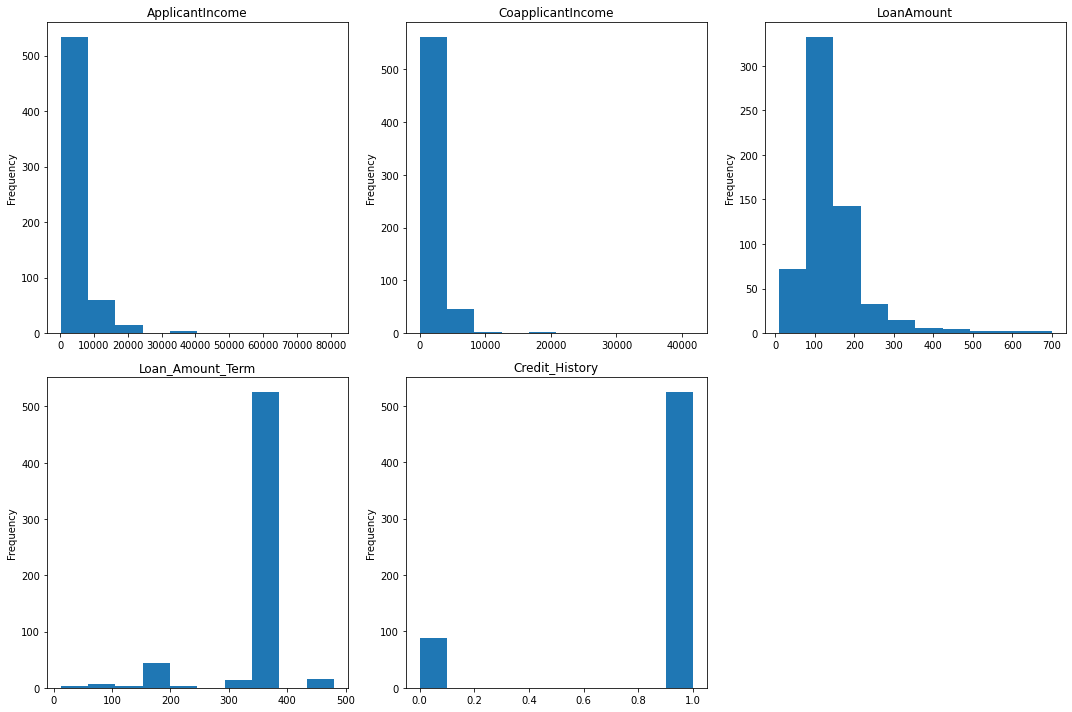

In [72]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable
for i, var in enumerate(int_vars):
    df[var].plot.hist(ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

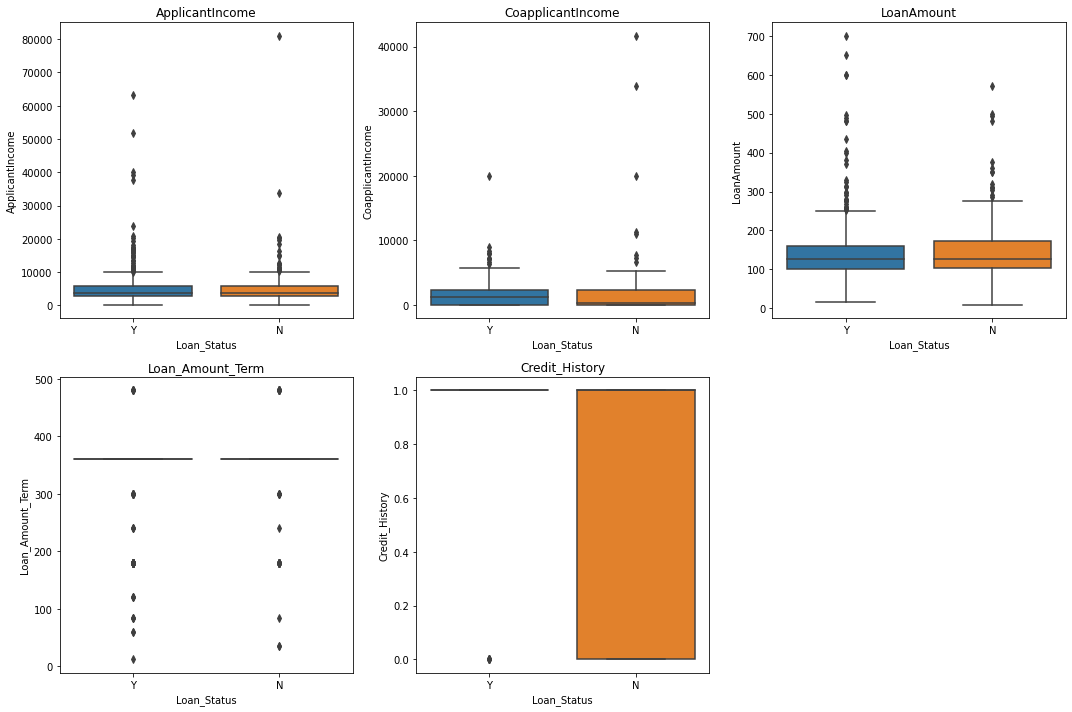

In [73]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each integer variable using Seaborn with hue='attrition'
for i, var in enumerate(int_vars):
    sns.boxplot(y=var, x='Loan_Status', data=df, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

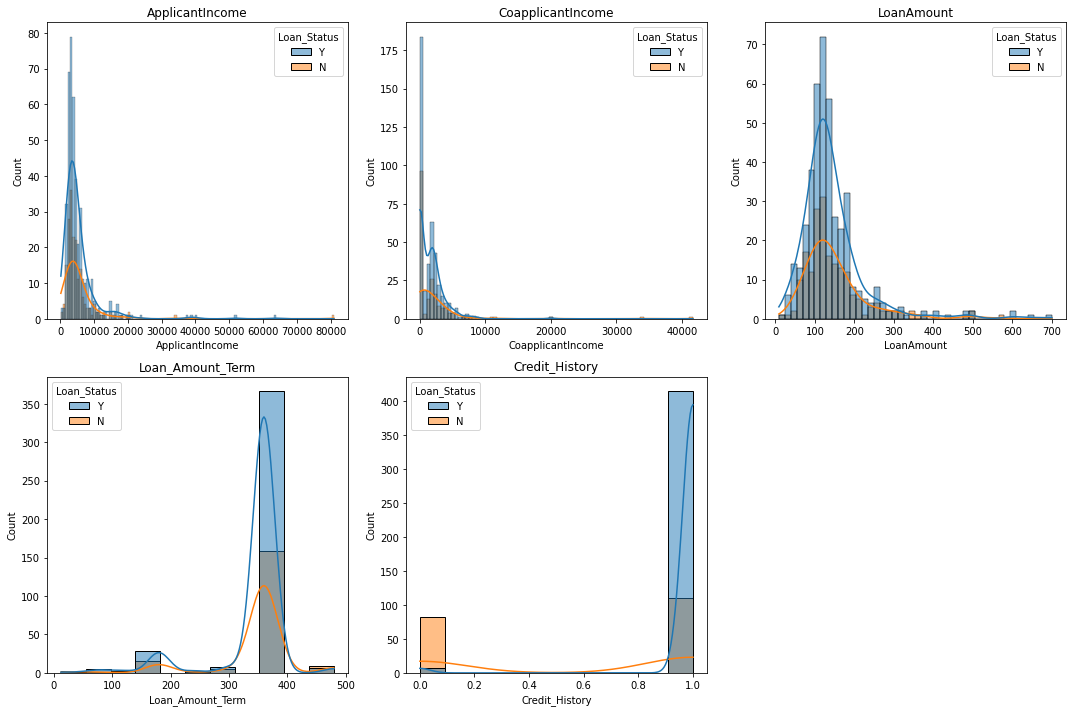

In [74]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable with hue='Attrition'
for i, var in enumerate(int_vars):
    sns.histplot(data=df, x=var, 
                 hue='Loan_Status', kde=True, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

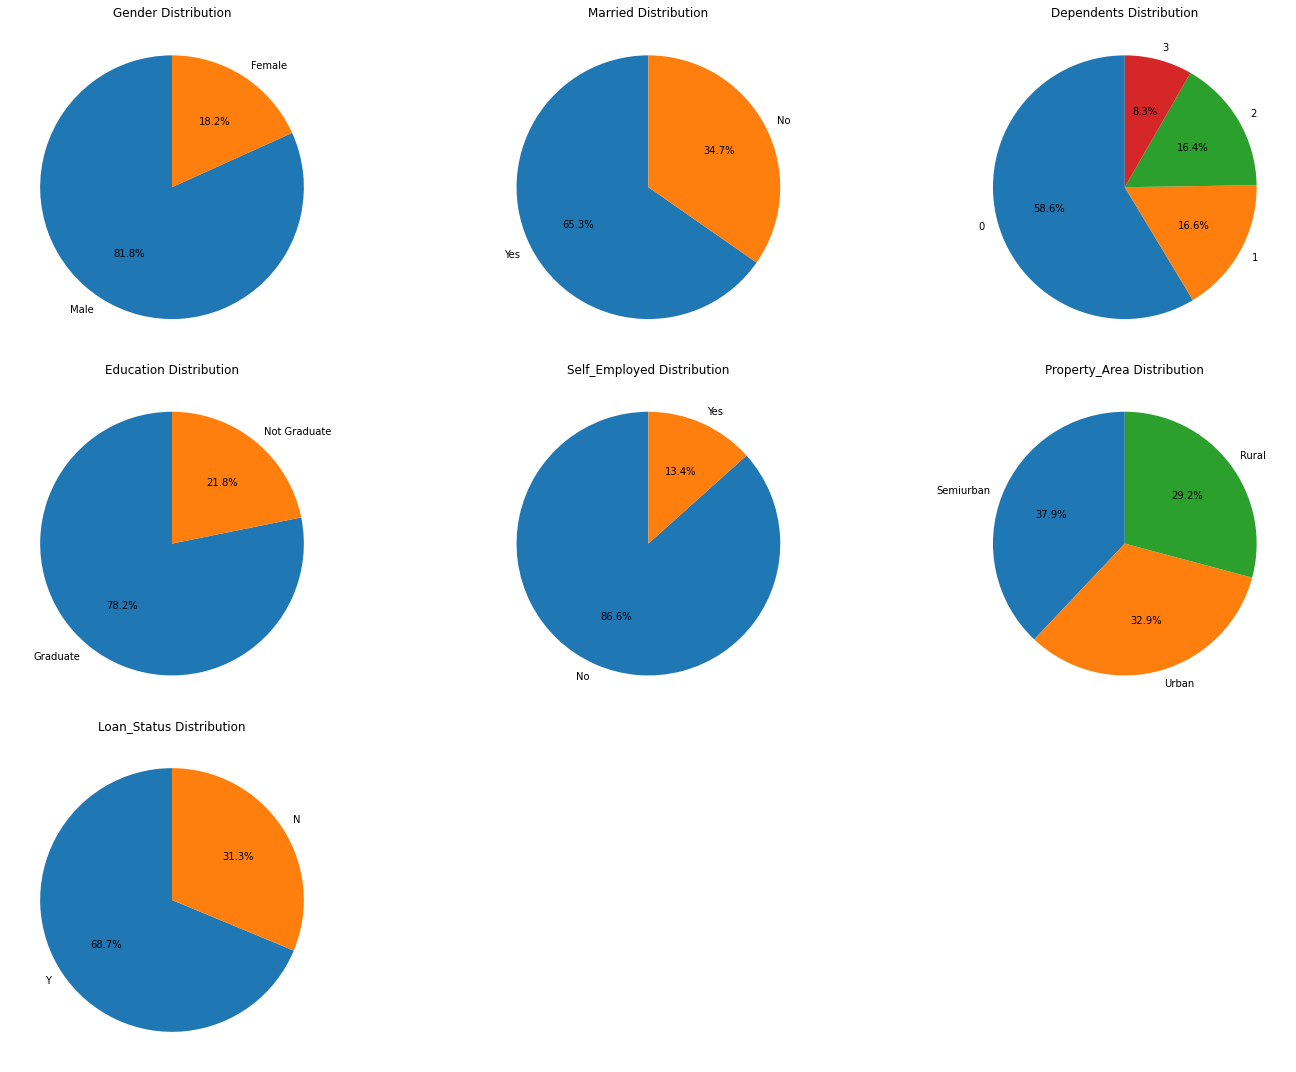

In [75]:
# Specify the maximum number of categories to show individually
max_categories = 5

# Filter categorical columns with 'object' data type
cat_cols = [col for col in df.columns if col != 'y' and df[col].dtype == 'object']

# Create a figure with subplots
num_cols = len(cat_cols)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 5*num_rows))

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Create a pie chart for each categorical column
for i, col in enumerate(cat_cols):
    if i < len(axs):  # Ensure we don't exceed the number of subplots
        # Count the number of occurrences for each category
        cat_counts = df[col].value_counts()

        # Group categories beyond the top max_categories as 'Other'
        if len(cat_counts) > max_categories:
            cat_counts_top = cat_counts[:max_categories]
            cat_counts_other = pd.Series(cat_counts[max_categories:].sum(), index=['Other'])
            cat_counts = cat_counts_top.append(cat_counts_other)

        # Create a pie chart
        axs[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
        axs[i].set_title(f'{col} Distribution')

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

In [76]:
# Check the amounnt of missing value
df.isnull().sum() / df.shape[0]

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [77]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [78]:
for i,val in enumerate(object_column):
    print(val ,"====>", df[val].unique())

Gender ====> ['Male' 'Female']
Married ====> ['No' 'Yes']
Dependents ====> ['0' '1' '2' '3']
Education ====> ['Graduate' 'Not Graduate']
Self_Employed ====> ['No' 'Yes']
Property_Area ====> ['Urban' 'Rural' 'Semiurban']
Loan_Status ====> ['Y' 'N']


In [79]:
df.drop('Dependents', axis=1,inplace=True)

## Label Encoding for Object Datatypes


In [80]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())

    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

Gender: [1 0]
Married: [0 1]
Education: [0 1]
Self_Employed: [0 1]
Property_Area: [2 0 1]
Loan_Status: [1 0]


In [81]:
X = df.drop("Loan_Status", axis=1)
Y = df['Loan_Status']

In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y, random_state=1234, test_size=0.2)

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [84]:
# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

In [85]:
# Train and evaluate each classifier
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)  # Use X_train or X_train_scaled depending on if you scaled the features
    y_pred = classifier.predict(X_test)  # Use X_test or X_test_scaled depending on if you scaled the features
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Print results
    print(f"Accuracy of {name}: {accuracy:.2f}")
    # print(f"Classification report of {name}:\n{report}")
    print("\n")

Accuracy of Logistic Regression: 0.86


Accuracy of Decision Tree: 0.73




Accuracy of Random Forest: 0.81


Accuracy of Support Vector Machine: 0.68


Accuracy of K-Nearest Neighbors: 0.62




c:\Users\Rahul\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Rahul\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Rahul\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## Feature scaling (if necessary)


In [103]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [104]:

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    classifier.fit(X_train_scaled, y_train)  # Use X_train or X_train_scaled depending on if you scaled the features
    y_pred = classifier.predict(X_test_scaled)  # Use X_test or X_test_scaled depending on if you scaled the features
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Print results
    print(f"Accuracy of {name}: {accuracy:.2f}")
    print("\n")

Accuracy of Logistic Regression: 0.86


Accuracy of Decision Tree: 0.71


Accuracy of Random Forest: 0.80


Accuracy of Support Vector Machine: 0.85


Accuracy of K-Nearest Neighbors: 0.83




# Apply Hyperparameter Tunning

In [105]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for each classifier
param_grid = {
    "Logistic Regression": {'C': [0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']},
    "Decision Tree": {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]},
    "Random Forest": {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]},
    "Support Vector Machine": {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto']},
    "K-Nearest Neighbors": {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
}



In [106]:

# Perform GridSearchCV for each classifier
for name, classifier in classifiers.items():
    print(f"Tuning hyperparameters for {name}...")
    clf = GridSearchCV(classifier, param_grid[name], cv=5, scoring='accuracy')
    clf.fit(X_train_scaled, y_train)
    
    print(f"Best parameters for {name}: {clf.best_params_}")
    
    # Evaluate the best model
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Accuracy of {name}: {accuracy:.2f}")
    print("\n")

Tuning hyperparameters for Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'lbfgs'}
Accuracy of Logistic Regression: 0.86


Tuning hyperparameters for Decision Tree...
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 5}
Accuracy of Decision Tree: 0.78


Tuning hyperparameters for Random Forest...
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
Accuracy of Random Forest: 0.83


Tuning hyperparameters for Support Vector Machine...
Best parameters for Support Vector Machine: {'C': 1, 'gamma': 'auto'}
Accuracy of Support Vector Machine: 0.85


Tuning hyperparameters for K-Nearest Neighbors...
Best parameters for K-Nearest Neighbors: {'n_neighbors': 7, 'weights': 'uniform'}
Accuracy of K-Nearest Neighbors: 0.85




In [107]:
df.drop(['Married','ApplicantIncome'], axis=1, inplace=True)

In [108]:
X_train,X_test,y_train,y_test = train_test_split(X,Y, random_state=1234, test_size=0.3)

In [109]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [110]:

# Perform GridSearchCV for each classifier
for name, classifier in classifiers.items():
    print(f"Tuning hyperparameters for {name}...")
    clf = GridSearchCV(classifier, param_grid[name], cv=5, scoring='accuracy')
    clf.fit(X_train_scaled, y_train)
    
    print(f"Best parameters for {name}: {clf.best_params_}")
    
    # Evaluate the best model
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Accuracy of {name}: {accuracy:.2f}")
    print("\n")

Tuning hyperparameters for Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Accuracy of Logistic Regression: 0.83


Tuning hyperparameters for Decision Tree...
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 2}
Accuracy of Decision Tree: 0.75


Tuning hyperparameters for Random Forest...
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
Accuracy of Random Forest: 0.81


Tuning hyperparameters for Support Vector Machine...
Best parameters for Support Vector Machine: {'C': 1, 'gamma': 'scale'}
Accuracy of Support Vector Machine: 0.83


Tuning hyperparameters for K-Nearest Neighbors...
Best parameters for K-Nearest Neighbors: {'n_neighbors': 9, 'weights': 'uniform'}
Accuracy of K-Nearest Neighbors: 0.82




# Selecting Logistic Regression

In [95]:
lr = LogisticRegression()
lr.fit(X_train, y_train)  # Use X_train or X_train_scaled depending on if you scaled the features
y_pred = lr.predict(X_test)  # Use X_test or X_test_scaled depending on if you scaled the features

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8617886178861789

In [96]:
import pickle
pickle.dump(lr,open("loan_predict_ra.pkl","wb"))

In [97]:
df.shape

(614, 11)

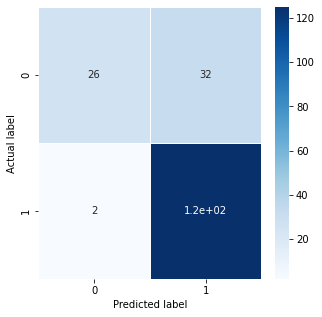

In [111]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(lr.score(X_test, y_test))